<a href="https://colab.research.google.com/github/manojmanivannan/ApacheSparkEssentials/blob/master/DataAnalysis/ScienceGivingDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q pyspark
!pip install -q findspark

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [2,235 kB]
Get:13 http://ppa

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [60]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType
from pyspark.sql.functions import to_timestamp,col,lit

sc = SparkSession.builder.getOrCreate()
sc

In [61]:
!wget -q -o science_federal_giving.csv https://media.githubusercontent.com/media/fivethirtyeight/data/master/science-giving/science_federal_giving.csv

In [62]:
!mv science_federal_giving.csv.1 science_federal_giving.csv

In [63]:
science = sc.read.format("csv").option("header","true").option("escapeQuotes", "true").load('science_federal_giving.csv')

| Header | Definition |
|:---:|:---:|
| cmte_nm | Committee name |
| cmte_id | Committee identification, assigned |
| cmte_tp | Committee type. List of committee type codes |
| cmte_pty | Committee party. List of party codes |
| cand_name | Candidate name |
| cand_pty_affiliation | Political party affiliation reported by the candidate |
| cand_office_st | Candidate state |
| cand_office | Candidate office. H = House, P = President, S = Senate |
| cand_office_district | Candidate district |
| cand_status | Candidate status. C = Statutory candidate, F = Statutory candidate for future election, N = Not yet a statutory candidate, P = Statutory candidate in prior cycle |
| rpt_tp | Report type. Report type codes |
| transaction_pgi | The code for which the contribution was made. EYYYY (election plus election year). P = Primary, G = General, O = Other, C = Convention, R = Runoff, S = Special, E = Recount |
| transaction_tp | Transaction type. Type codes |
| entity_tp | Entity type. Only valid for electronic filings received after April 2002. CAN = Candidate, CCM = Candidate Committee, COM = Committee, IND = Individual (a person), ORG = Organization (not a committee and not a person), PAC = Political Action Committee, PTY = Party Organization |
| cleaned_name | Contributor/lender/transfer name |
| city | City/town |
| state | State |
| zip_code | Zip code |
| employer | Employer |
| cleaned_occupation | Occupation |
| classification | Classification of occupation |
| transaction_dt | Transaction date (MMDDYYYY) |
| cycle | Election cycle |
| transaction_amt | Transaction amount |
| 2016_dollars | Transation amount adjusted for inflation |
| other_id | Other identification number. For contributions from individuals this column is null. For contributions from candidates or other committees this column will contain that contributor's FEC ID. |
| tran_id | Transaction ID |
| file_num | A unique identifier associated with each itemization or transaction appearing in an FEC electronic file. Only valid for electronic filings. |
| memo_cd | 'X' indicates that the amount is not to be included in the itemization total. |
| memo_text | A description of the activity. |
| sub_id | FEC record number |

In [64]:
science.count()

881793

In [65]:
science.show(15)

+--------------------+---------+-------+--------+--------------------+--------------------+--------------+-----------+--------------------+-----------+------+---------------+--------------+---------+-------------------+-------------+-----+---------+--------------------+-------------------+--------------+--------------+-----+---------------+------------+---------+---------------+--------+-------+--------------------+--------+
|             cmte_nm|  cmte_id|cmte_tp|cmte_pty|           cand_name|cand_pty_affiliation|cand_office_st|cand_office|cand_office_district|cand_status|rpt_tp|transaction_pgi|transaction_tp|entity_tp|       cleaned_name|         city|state| zip_code|            employer|  cleanedoccupation|classification|transaction_dt|cycle|transaction_amt|2016_dollars| other_id|        tran_id|file_num|memo_cd|           memo_text|  sub_id|
+--------------------+---------+-------+--------+--------------------+--------------------+--------------+-----------+--------------------+---

In [66]:
science.printSchema()

root
 |-- cmte_nm: string (nullable = true)
 |-- cmte_id: string (nullable = true)
 |-- cmte_tp: string (nullable = true)
 |-- cmte_pty: string (nullable = true)
 |-- cand_name: string (nullable = true)
 |-- cand_pty_affiliation: string (nullable = true)
 |-- cand_office_st: string (nullable = true)
 |-- cand_office: string (nullable = true)
 |-- cand_office_district: string (nullable = true)
 |-- cand_status: string (nullable = true)
 |-- rpt_tp: string (nullable = true)
 |-- transaction_pgi: string (nullable = true)
 |-- transaction_tp: string (nullable = true)
 |-- entity_tp: string (nullable = true)
 |-- cleaned_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- employer: string (nullable = true)
 |-- cleanedoccupation: string (nullable = true)
 |-- classification: string (nullable = true)
 |-- transaction_dt: string (nullable = true)
 |-- cycle: string (nullable = true)
 |-- transacti

In [67]:


labels = [
          ('cmte_nm',StringType()),
          ('cmte_id',StringType()),
          ('cmte_tp',StringType()),
          ('cmte_pty',StringType()),
          ('cand_name',StringType()),
          ('cand_pty_affiliation',StringType()),
          ('cand_office_st',StringType()),
          ('cand_office',StringType()),
          ('cand_office_district',StringType()),
          ('cand_status',StringType()),
          ('rpt_tp',StringType()),
          ('transaction_pgi',StringType()),
          ('transaction_tp',StringType()),
          ('entity_tp',StringType()),
          ('cleaned_name',StringType()),
          ('city',StringType()),
          ('state',StringType()),
          ('zip_code',StringType()),
          ('employer',StringType()),
          ('cleanedoccupation',StringType()),
          ('classification',StringType()),
          ('transaction_dt',IntegerType()),
          ('cycle',IntegerType()),
          ('transaction_amt',DoubleType()),
          ('2016_dollars',DoubleType()),
          ('other_id',StringType()),
          ('tran_id',StringType()),
          ('file_num',IntegerType()),
          ('memo_cd',StringType()),
          ('memo_text',StringType()),
          ('sub_id',StringType()),
]

In [68]:
schema = StructType([StructField(x[0],x[1],True) for x in labels])
science = sc.read.format("csv").schema(schema).option("header","true").option("escapeQuotes", "true").load('science_federal_giving.csv')

In [69]:
science.show(5)

+--------------------+---------+-------+--------+----------------+--------------------+--------------+-----------+--------------------+-----------+------+---------------+--------------+---------+-------------------+---------+-----+--------+--------------------+-------------------+--------------+--------------+-----+---------------+------------+---------+---------------+--------+-------+--------------------+--------+
|             cmte_nm|  cmte_id|cmte_tp|cmte_pty|       cand_name|cand_pty_affiliation|cand_office_st|cand_office|cand_office_district|cand_status|rpt_tp|transaction_pgi|transaction_tp|entity_tp|       cleaned_name|     city|state|zip_code|            employer|  cleanedoccupation|classification|transaction_dt|cycle|transaction_amt|2016_dollars| other_id|        tran_id|file_num|memo_cd|           memo_text|  sub_id|
+--------------------+---------+-------+--------+----------------+--------------------+--------------+-----------+--------------------+-----------+------+------

## What insights can we get from this dataset

1. Analyse the dollars contributed by each classification

Max amount donated in a single transaction: $100200.0
Min amount donated in a single transaction: $0.0


In [155]:
science.select("cleanedoccupation","transaction_amt").groupBy('cleanedoccupation').sum().orderBy('sum(transaction_amt)',ascending=True).show(20)

+--------------------+--------------------+
|   cleanedoccupation|sum(transaction_amt)|
+--------------------+--------------------+
|                null|                null|
|PUBLICATION DISTR...|              -400.0|
|5TH GRADE BILINGU...|                 0.0|
|PHARMACEUTICAL R&...|                 0.0|
|SCIENCE TEACHER/O...|                 0.0|
|CIVILENGINEER/PRO...|                 0.0|
|CEO MANAGING PART...|                 0.0|
|PROFESSOR OF BIOC...|                 0.0|
|AEROSPACE VENTURE...|                 0.0|
|SENIOR DESKTOP EN...|                 1.0|
|HIGHER EDUCATION/...|                 1.0|
|OPERATIONS CENTER...|                 4.0|
| SCIENTIST, POST DOC|                 5.0|
|CO-DIRECTOR BAY A...|                 5.0|
|PROF. BIOLOGICAL ...|                 5.0|
|ELECTRICAL SYSTEM...|                 5.0|
|       NRL PHYSICIST|                 5.0|
|  HAPPINESS ENGINEER|                 5.0|
|RETIRED SENIOR PR...|                 5.0|
|STATISTICIAN IN M...|          

Let's filter records where there no transaction_amt

In [156]:
dollars = science.filter(col("transaction_amt")>=0)
print(f'Max amount donated in a single transaction: ${dollars.agg({"transaction_amt":"max"}).collect()[0][0]}')
print(f'Min amount donated in a single transaction: ${dollars.agg({"transaction_amt":"min"}).collect()[0][0]}')

Max amount donated in a single transaction: $100200.0
Min amount donated in a single transaction: $0.0


In [158]:
dollars.select("cleanedoccupation","transaction_amt").groupBy('cleanedoccupation').sum().orderBy('sum(transaction_amt)',ascending=False).show(10)


+-------------------+--------------------+
|  cleanedoccupation|sum(transaction_amt)|
+-------------------+--------------------+
|           ENGINEER|         5.3879925E7|
|ENGINEER (SOFTWARE)|         1.1901663E7|
|          SCIENTIST|           9177220.0|
|          GEOLOGIST|           4318056.0|
|     CIVIL ENGINEER|           4095654.0|
|          PHYSICIST|           3682003.0|
| ENGINEER PETROLEUM|           1802460.0|
|ELECTRICAL ENGINEER|           1782930.0|
| RESEARCH SCIENTIST|           1398577.0|
|          (CHEMIST)|           1316661.0|
+-------------------+--------------------+
only showing top 10 rows



In [159]:
dollars_pd = dollars.select("cleanedoccupation","transaction_amt").groupBy('cleanedoccupation').sum().orderBy('sum(transaction_amt)',ascending=False).toPandas()

In [160]:
dollars_pd

,cleanedoccupation,sum(transaction_amt)
0,ENGINEER,53879925.0
1,ENGINEER (SOFTWARE),11901663.0
2,SCIENTIST,9177220.0
3,GEOLOGIST,4318056.0
4,CIVIL ENGINEER,4095654.0
...,...,...
9260,"DEAN, SCIENCE AND MATH",5.0
9261,SOFTWARE ENGINEER FOR JET ENGINE,5.0
9262,OPERATIONS CENTER ENGINEER,4.0
9263,SENIOR DESKTOP ENGINEER,1.0


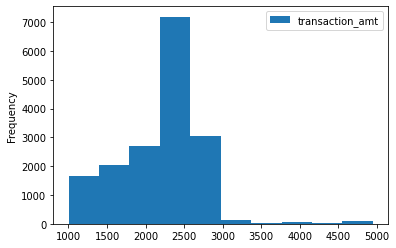

In [148]:
dollars_pd.plot.hist(bins=10)